In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Neural Network with a dummy neural network

In [63]:
from helpersNeuronalNet import*
# load the training data set
DATA_TRAIN_PATH = "data/data_train.csv"
data = load_data(DATA_TRAIN_PATH)

In [56]:
from keras.models import Model,load_model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Concatenate, Dense, Dropout, Add, Activation, Lambda
from keras.callbacks import EarlyStopping
# stop epochs when the model converge
usualCallback = EarlyStopping()

Train on 1059256 samples, validate on 117696 samples
Epoch 1/10000
1059256/1059256 [==============================] - 29s 28us/step - loss: 0.1392 - val_loss: 0.1337
Epoch 2/10000
1059256/1059256 [==============================] - 27s 25us/step - loss: 0.1354 - val_loss: 0.1332
Epoch 3/10000
1059256/1059256 [==============================] - 21s 20us/step - loss: 0.1349 - val_loss: 0.1331
Epoch 4/10000
1059256/1059256 [==============================] - 24s 22us/step - loss: 0.1348 - val_loss: 0.1331


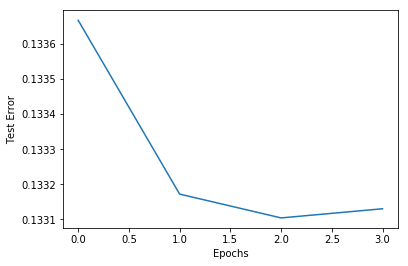

In [57]:
from DummyNet import recommenderNet
# set the model
model = recommenderNet(n_users, n_movies, n_factors)

if os.path.exists('model_DummyNet.h5'):
    #load the model
    model = load_model('model_DummyNet.h5')
else:
    # train the model with y_train and X_train
    history = model.fit(x=X_train_array, y= y_train, batch_size=1024, epochs=10000, verbose=1, validation_data=(X_test_array,y_test), callbacks=[usualCallback])
    #Save the model
    model.save('model_DummyNet.h5')
    #plot the test Root Mean Square
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Test Error")

## Create a submission prediction

In [ ]:
# load the test data
DATA_TEST_PATH = "data/sampleSubmission.csv"
samples = load_data(DATA_TEST_PATH)

In [65]:
samples ['user'] = user_enc.fit_transform(samples['user_id'].values)
samples['movie'] = item_enc.fit_transform(samples['movie_id'].values)
X_samples = samples[['user', 'movie']].values
X_samples_array = [X_samples[:,0], X_samples[:,1]]

In [66]:
#make predictions with model
sample_pred = model.predict(X_samples_array)

In [69]:
print(sample_pred)

[[0.05955226 0.14823733 0.3579268  0.2704927  0.16379085]
 [0.08011974 0.16050558 0.3343182  0.24062547 0.18443097]
 [0.01423595 0.06425991 0.27671057 0.36924586 0.2755477 ]
 ...
 [0.07504976 0.15366739 0.32826966 0.25556514 0.18744805]
 [0.08269288 0.14590028 0.2917071  0.23733068 0.24236904]
 [0.01082622 0.05528766 0.25491685 0.37466872 0.30430052]]


In [70]:
rating_samples = (np.argmax(sample_pred,1)+1).tolist()
samples['rating'] = rating_samples

In [68]:
from helpers import create_csv
# make a csv file
PATH_SUBMISSION = "data/DummyNeuralNetworkPrediction.csv"
create_csv(PATH_SUBMISSION, samples)